DISTPERF Data Exploration:
- PERF1 Postsecondary Indicators: College, Career, and Military Readiness (CCMR), TSIA, College Prep




Importing necesssary packages 

In [12]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Pulling all DISTPERF1 files from 2019-20 --> 2022-23 academic school years 

In [13]:
# Initialize dictionary to store dataframes
dataframes = {}

# Base directory
base_path = r"C:\Users\mmath\OneDrive\Desktop\Capstone\HERC_Sp25\0_Datasets_csv"

# Iterate through years
for year in range(2020, 2024):
    file_names = [
        f"distperf_{year}_clean.csv",
        f"distperf1_{year}_clean.csv",
        f"distperf2_{year}_clean.csv"
    ]
    
    for file_name in file_names:
        file_path = os.path.join(base_path, f"Data{year}", "District", "clean_data", file_name)
        
        if os.path.exists(file_path):  # Check if file exists
            key = f"{file_name.split('.')[0]}"  # Extract filename without extension
            dataframes[key] = pd.read_csv(file_path)  # Read into dictionary

# Print keys to verify
print("Loaded DataFrames:", dataframes.keys())

Loaded DataFrames: dict_keys(['distperf_2020_clean', 'distperf1_2021_clean', 'distperf2_2021_clean', 'distperf1_2022_clean', 'distperf2_2022_clean', 'distperf1_2023_clean', 'distperf2_2023_clean'])


Creating functions to examine the number of missing values for each column, and dropping columns with >50% missing vlaues. 

In [14]:
def calculate_missing_percentage(df):
    """
    Function to calculate the percentage of missing values in each column of a given dataset.
    
    Parameters:
        df (pd.DataFrame): The dataset as a pandas DataFrame.
    
    Returns:
        pd.Series: A Series with column names as index and percentage of missing values as values.
    """
    missing_percentage = (df.isna().sum() / len(df)) * 100
    missing_percentage = missing_percentage[missing_percentage > 0]  # Only keep columns with missing values
    
    return missing_percentage.sort_values(ascending=False)  # Sort in descending order

def drop_columns(df, threshold=50):
    """
    Function to drop columns with missing values exceeding a specified threshold
    and columns containing 'numerator' or 'denominator' in their names. These columsn are going to be fairly useless for analysis 
    
    Parameters:
        df (pd.DataFrame): The dataset as a pandas DataFrame.
        threshold (float): The percentage threshold for dropping columns.
    
    Returns:
        pd.DataFrame: The dataframe with columns dropped.
    """
    print(f"Original Dataset Shape: {df.shape}")
    missing_percentage = calculate_missing_percentage(df)
    cols_to_drop = set(missing_percentage[missing_percentage >= threshold].index)
    
    # Drop columns containing 'numerator' or 'denominator' (case-insensitive)
    cols_to_drop.update([col for col in df.columns if 'numerator' in col.lower() or 'denominator' in col.lower()])
    
    resulting_df = df.drop(columns=cols_to_drop)
    print(f"Dropped Dataset Shape: {resulting_df.shape}")
    return resulting_df


Applying dropped datasets logic to create cleaner datasets

In [15]:
for dataset in dataframes:
    dataframes[dataset] = drop_columns(dataframes[dataset])

Original Dataset Shape: (1202, 4179)
Dropped Dataset Shape: (1202, 1098)
Original Dataset Shape: (1204, 2014)
Dropped Dataset Shape: (1204, 511)
Original Dataset Shape: (1204, 1300)
Dropped Dataset Shape: (1204, 398)
Original Dataset Shape: (1207, 2043)
Dropped Dataset Shape: (1207, 525)
Original Dataset Shape: (1207, 1286)
Dropped Dataset Shape: (1207, 406)
Original Dataset Shape: (1209, 2012)
Dropped Dataset Shape: (1209, 502)
Original Dataset Shape: (1209, 1298)
Dropped Dataset Shape: (1209, 406)


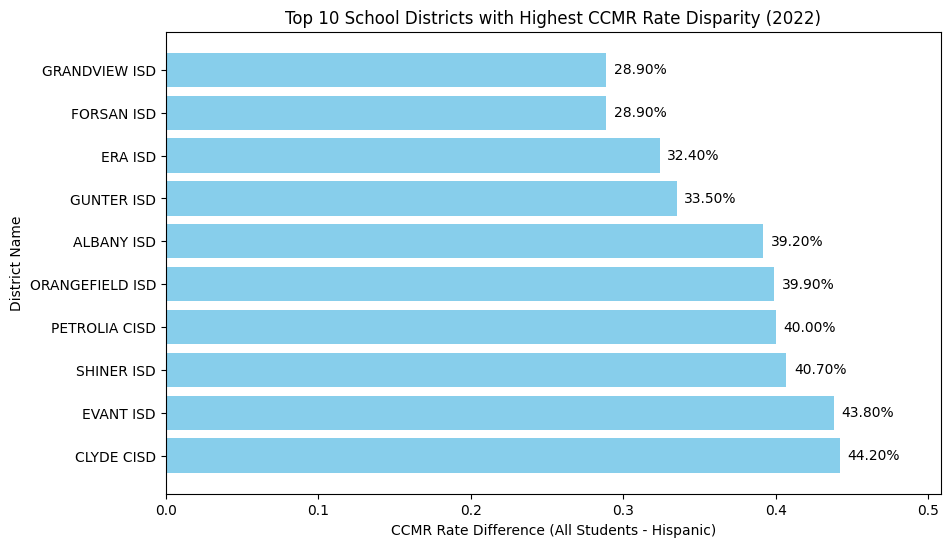

In [16]:
distperf1_2023 = dataframes['distperf1_2023_clean']

# Extract relevant columns
all_students_2022 = distperf1_2023['District 2022 College, Career, & Military Ready Graduates: All Students Rate'] / 100
hispanic_2022 = distperf1_2023['District 2022 College, Career, & Military Ready Graduates: Hispanic Rate'] / 100
#all_students_2021 = distperf1_2023['District 2021 College, Career, & Military Ready Graduates: All Students Rate'] / 100
#hispanic_2021 = distperf1_2023['District 2021 College, Career, & Military Ready Graduates: Hispanic Rate'] / 100

# Calculate the absolute difference between all students and Hispanic rates
rate_difference = all_students_2022 - hispanic_2022 #np.abs(all_students_2022 - hispanic_2022)

# Get the top 10 districts with the highest difference
top_10_diff = distperf1_2023.loc[rate_difference.nlargest(10).index, ['DISTNAME']].copy()
top_10_diff['Rate Difference'] = rate_difference.nlargest(10).values

# Sorting for better visualization
top_10_diff = top_10_diff.sort_values(by='Rate Difference', ascending=True)

# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_diff['DISTNAME'], top_10_diff['Rate Difference'], color='skyblue')
plt.xlim(0, max(top_10_diff['Rate Difference']) * 1.15)  # Add 15% padding to the right

# Add labels to the bars
for bar, diff in zip(bars, top_10_diff['Rate Difference']):
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2, f'{diff:.2%}', va='center')

# Titles and labels
plt.xlabel('CCMR Rate Difference (All Students - Hispanic)')
plt.ylabel('District Name')
plt.title('Top 10 School Districts with Highest CCMR Rate Disparity (2022)')
plt.gca().invert_yaxis()  # Invert y-axis to show highest disparities at the top

# Show plot
plt.show()


Gathering top 5 and bottom 5 schools in terms of  District 2022 College, Career, & Military Ready Graduates: All Students Rate

Examining 'District 2022 College, Career, & Military Ready Graduates: All Students Rate' 
* Exploring the distribution of graduation rates and bottom 10 schools by graduation rate 

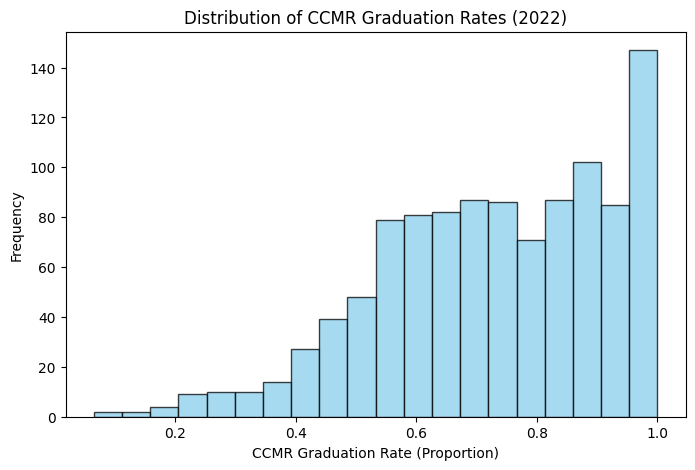

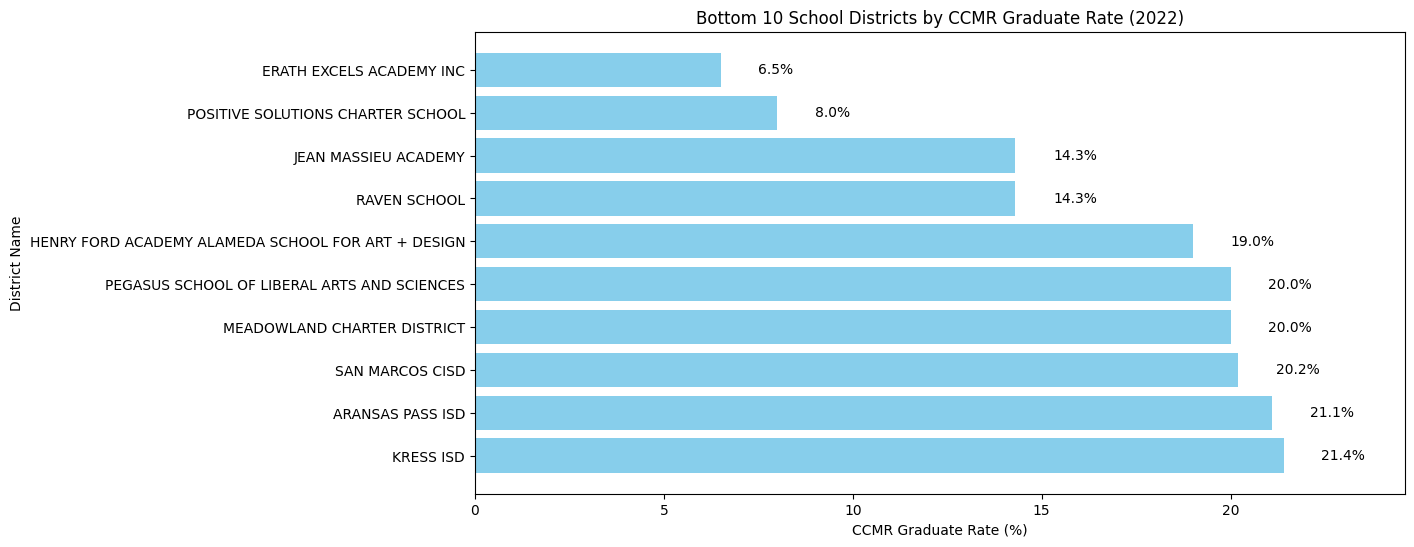

In [17]:
#Gathering all student rates 
all_students_2022 = distperf1_2023['District 2022 College, Career, & Military Ready Graduates: All Students Rate'] / 100
all_students_2021 = distperf1_2023['District 2021 College, Career, & Military Ready Graduates: All Students Rate'] / 100

#### Creating a histogram of rates 
# Creating the histogram
plt.figure(figsize=(8, 5))
plt.hist(all_students_2022, bins=20, color='skyblue', edgecolor='black', alpha=0.75)

# Titles and labels
plt.xlabel('CCMR Graduation Rate (Proportion)')
plt.ylabel('Frequency')
plt.title('Distribution of CCMR Graduation Rates (2022)')

# Show the grid for better readability
plt.grid(axis='y', linestyle='None', alpha=0.7)

# Display the histogram
plt.show()




### Finding the bottom 10 school districts by CCMR Graduate: All Student Rate 
bottom_10_schools = distperf1_2023.nsmallest(10,
                                         'District 2022 College, Career, & Military Ready Graduates: All Students Rate')[['DISTNAME',
                                                                                                                           'District 2022 College, Career, & Military Ready Graduates: All Students Rate']]
# Creating the bar plot
plt.figure(figsize=(12, 6))
bars = plt.barh(bottom_10_schools['DISTNAME'], bottom_10_schools['District 2022 College, Career, & Military Ready Graduates: All Students Rate'], color='skyblue')
# Adjust x-axis limit to prevent text from falling off
plt.xlim(0, max(bottom_10_schools['District 2022 College, Career, & Military Ready Graduates: All Students Rate']) * 1.15)  # Add 15% padding to the right
# Adding labels to each bar
for bar, rate in zip(bars, bottom_10_schools['District 2022 College, Career, & Military Ready Graduates: All Students Rate']):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, f'{rate:.1f}%', va='center')

# Titles and labels
plt.xlabel('CCMR Graduate Rate (%)')
plt.ylabel('District Name')
plt.title('Bottom 10 School Districts by CCMR Graduate Rate (2022)')
plt.gca().invert_yaxis()  # Invert y-axis to show lowest rates at the top

# Show plot
plt.show()




In [22]:
list(dataframes['distperf1_2023_clean'].columns)

['DISTRICT_id',
 'District 2022 College, Career, & Military Ready Graduates: All Students Rate',
 'District 2022 College, Career, & Military Ready Graduates: Hispanic Rate',
 'District 2022 College, Career, & Military Ready Graduates: White Rate',
 'District 2022 College, Career, & Military Ready Graduates: Male Rate',
 'District 2022 College, Career, & Military Ready Graduates: Female Rate',
 'District 2022 College, Career, & Military Ready Graduates: Econ Disadv Rate',
 'District 2022 College, Career, & Military Ready Graduates: Special Ed Rate',
 'District 2022 College, Career, & Military Ready Graduates: At Risk Rate',
 'District 2021 College, Career, & Military Ready Graduates: All Students Rate',
 'District 2021 College, Career, & Military Ready Graduates: Hispanic Rate',
 'District 2021 College, Career, & Military Ready Graduates: White Rate',
 'District 2021 College, Career, & Military Ready Graduates: Male Rate',
 'District 2021 College, Career, & Military Ready Graduates: Fem